# Chain Matrix Multiplication

## Problema
El problema de la Multiplicación de Cadenas de Matrices consiste en que, dado un conjunto de matrices con dimensiones específicas representadas en un arreglo, se busca determinar la secuencia óptima de multiplicación de estas matrices de manera que se minimice el número total de multiplicaciones de elementos requeridas. (GfG, 2022)

### Ejemplo del Problema
Buscamos multiplicar las siguientes matrices: 
$$
A_{(40x20)} \cdot B_{(20x30)} \cdot C_{(30x10)} \cdot D_{(10x30)}
$$

Existen varias formas de multiplicar estas matrices (por asociatividad):
$$
ABCD
$$
$$
(AB)CD
$$
$$
A(BC)D
$$
$$
(AB)(CD)
$$

Entonces, ¿cómo sabemos cuál es la mejor manera de multiplicar las matrices? ¿Cuál es la que minimiza el número de multiplicaciones de elementos que se necesita? Esto, con el objetivo de obtener el resultado de la multiplicación de una manera más rápida.

### Ejemplo de Solución
La resolución de este problema tiene un acercamiento con [programación dinámica](#programación-dinámica) y otro con el paradigma de [Divide y Vencerás](#divide-y-vencerás). Ambos funcionan de la misma manera. Proveemos un arreglo con las dimensiones de las matrices y se busca la secuencia óptima de multiplicación. Para el [ejemplo de problema](#ejemplo-del-problema) anterior, el arreglo sería ```[40, 20, 30, 10, 30]```. Este arreglo representa la multiplicación de las matrices $A_{(40x20)} \cdot B_{(20x30)} \cdot C_{(30x10)} \cdot D_{(10x30)}$.

Es necesario notar que el número de columnas de la matriz $i$ es igual al número de filas de la matriz $i+1$.

## Divide y Vencerás

Para complementar las secciones de aplicabilidad, es necesario comprender la idea en la que se estructura el problema.

Asumimos que existe un método $costo\_min(M_1, M_2)$, el cual retorna el costo mínimo de multiplicar la matriz $M_1$ con la matriz $M_2$.

Entonces, para una cadena de productos de matrices como $M_1 \cdot M_2 \cdot M_3 \cdot \ldots \cdot M_{n-1} \cdot M_n$ podemos obtener el costo mínimo de multiplicación de la cadena completa de matrices **dividiendo** el problema así:
$$
\begin{equation}
  \text{costo mínimo} = min
    \begin{cases}
        costo\_min(M_1, M_2 \cdot M_3 \ldots \cdot M_n) \\
        costo\_min(M_1 \cdot M_2 \ldots M_{n-1}, M_n)
    \end{cases}
\end{equation}
$$

Esto genera dos subproblemas, los cuales pueden ser descompuestos en otros subproblemas más pequeños bajo la misma idea hasta llegar a realizar la multiplicación de solamente dos matrices (caso base). En este punto, sabemos cuál es la cantidad mínima de multiplicaciones (**conquistamos**). Luego, en caso de ser necesario, **combinamos** con otro cálculo de $costo\_min$.  

### Algoritmo
    Función Principal: Recibe matrix_array que es una lista y devuelve un entero:
        Establecer array_len como la longitud de matrix_array
    
        Inicializar una tabla 2D de tamaño array_len x array_len, llena de infinito
    
        Iniciar el proceso recursivo desde la primera matriz hasta la última con la Función Recursiva pasando el arreglo con las dimensiones de las matrices, la tabla y los índices de inicio (1) y fin (array_len - 1)
    
    Fin de la Función
    
    Función Recursiva: Recibe matrix_array, i, j y devuelve un entero:
        // Caso base: si solo hay una matriz en la cadena
        Si i es igual a j Entonces
            Devolver 0
        Fin Si
    
        // Inicializar el conteo mínimo
        Establecer _min a infinito
    
        // ====  DIVIDIR  ====
        Para k desde i hasta j Haz
            // Dividir: El problema se divide en subproblemas más pequeños (multiplicando cadenas de matrices más pequeñas)
            Establecer count al resultado de _MatrixChainOrderRecursive con parámetros matrix_array, i, k
            Añadir a count el resultado de _MatrixChainOrderRecursive con parámetros matrix_array, k + 1, j
    
            // Combinar: Las soluciones a los subproblemas se combinan (los conteos de multiplicación se suman)
            Añadir a count el producto de matrix_array[i - 1], matrix_array[k] y matrix_array[j]
    
            // Actualizar el conteo mínimo si se encuentra un conteo más bajo
            Si count es menor que _min Entonces
                Establecer _min a count
            Fin Si
        Fin Para
    
        // Devolver conteo mínimo
        Devolver _min
    Fin Función

### Aplicabilidad
El acercamiento utilizando DaC es aplicable para este problema, ya que existe la posibilidad de dividir el problema en subproblemas más pequeños que pueden resolverse de manera independiente. Siendo el enfoque justificable por la capacidad de dividir la cadena de matrices en partes más pequeñas, resolver cada parte de manera recursiva y luego combinar las soluciones de manera óptima para obtener el resultado final. Dicha aplicación conlleva dividir la cadena en dos subcadenas en cada paso recursivo, calcular el costo mínimo de multiplicación para cada subcadena y combinar las soluciones para obtener el costo total mínimo (GfG, 2022).

### Implementación

In [15]:
def _MatrixChainOrderRecursive(matrix_array: list, i: int, j: int) -> int:
    """
    Helper function for the Divide and Conquer approach to find the minimum number of multiplications needed to multiply the chain of matrices.
    :param matrix_array: The dimensions of the matrices in the chain. A chain is not necessarily the whole list.
    :param i: The starting index of the chain.
    :param j: The ending index of the chain.
    :return: The minimum number of multiplications needed.
    """
    
    # Base case: if there is only one matrix in the chain
    if i == j:
        # Conquer: The problem is already solved (no multiplication needed for a single matrix)
        return 0
 
    # Initialize the minimum count
    _min = float('inf')

    for k in range(i, j):
        # Divide: The problem is divided into smaller subproblems (multiplying smaller chains of matrices)
        count = _MatrixChainOrderRecursive(matrix_array, i, k)              # count the number of multiplications needed for the left chain
        count += _MatrixChainOrderRecursive(matrix_array, k + 1, j)         # count the number of multiplications needed for the right chain

        # Combine: The solutions to the subproblems are combined (the multiplication counts are added together)
        count += matrix_array[i - 1] * matrix_array[k] * matrix_array[j]   # count the number of multiplications needed for the current multiplication
        
        # Update the minimum count if a lower count is found
        if count < _min:
            _min = count
 
    # Return minimum count
    return _min  # The minimum count represents the solution to the original problem

In [16]:
def MatrixChainOrderDnC(matrix_array: list) -> int:
    """
    Returns the minimum number of multiplications needed to multiply the chain of matrices. Uses Divide and Conquer
    :param matrix_array: The dimensions of the matrices in the chain.
    :return: The minimum number of multiplications needed.
    """
    array_len = len(matrix_array)

    # start the recursive process from the first matrix to the last
    return _MatrixChainOrderRecursive(matrix_array, 1, array_len - 1)

## Programación Dinámica
El acercamiento de programación dinámica permite que cada vez que se llega a realizar al caso base, es almacenado en una tabla para evitar los cálculos redundantes.

Para clarificar de manera visual, observar el siguiente árbol de recursividad. En él se pueden apreciar dos aspectos claves para poder aplicar programación dinámica, que son:
- *Subestructuras óptimas*: Descomponemos los problemas grandes en subproblemas más pequeños, los cuales se resuelven para encontrar el número mínimo de multiplicaciones. Podemos decir que el problema tiene subestructuras óptimas.
- *Traslapo de subproblemas*: En el árbol de recursión se aprecia como hay ciertos subproblemas que se repiten, ocupando recursos computacionales adicionales.

![Árbol de Recursión para el Acercamiento dinámico](media/recursion_tree.jpeg)

La manera en la que se ha resuelto es a través de un acercamiento _top-down_, pues primero se verifica si ya ha sido resuelto para devolver un valor. Si no ha sido resuelto, se hace el cálculo y se almacena la respuesta para referencia futura.

### Algoritmo
    Recibe matrix_array que es una lista con las dimensiones de las matrices a multiplicar

        Establecer array_len como la longitud de matrix_array

        Inicializar una tabla 2D de tamaño (array_len x array_len), llena de 0s

        Para current_length desde 2 hasta array_len:
            Para i desde 1 hasta array_len - current_length + 1:
                Establecer j como i + current_length - 1
                Establecer la posición tabla[i][j] como infinito

                Para current_point desde i hasta j:
                    Calcular q como la suma de table[i][current_point], table[current_point + 1][j] y el producto de matrix_array[i - 1], matrix_array[current_point] y matrix_array[j]

                    Si q es menor que table[i][j], actualizar table[i][j] a q

        Devolver table[1][array_len - 1], pues ahí se encuentra el costo mínimo de la cadena completa de matrices
        
    Fin

### Aplicabilidad
La utilización de programación dinámica es aplicable para este problema, debido a la presencia de subestructura óptima y subproblemas superpuestos en el problema. Este enfoque se justifica teóricamente por la capacidad de descomponer el problema en subproblemas más pequeños, calcular y almacenar las soluciones de estos de manera eficiente y luego la combinación de estas para obtener la solución óptima global.  Dicha aplicación conlleva construir una tabla de programación dinámica que almacene las soluciones óptimas para subproblemas específicos, calculando iterativamente las soluciones basadas en las soluciones de subproblemas más pequeños y utilizando la memoización para evitar cálculos adicionales innecesarios (More, 2021).

### Implementación

In [17]:
def MatrixChainOrderDP(matrix_array: list) -> int:
    """
    Returns the minimum number of multiplications needed to multiply the chain of matrices. Uses Dynamic Programming
    :param matrix_array: The dimensions of the matrices in the chain.
    :return: The minimum number of multiplications needed.
    """
    array_len = len(matrix_array)

    # Initialize a 2D table to store the minimum cost of matrix multiplication.
    table = [
        [0 for _ in range(array_len)]
        for _ in range(array_len)
    ]

    # Current_length represents the chain length being considered, the algorithm gradually increases the chain length from 2 to n
    for current_length in range(2, array_len):
        for i in range(1, array_len - current_length + 1):
            # calculate the ending matrix index in the chain based on current_length and i
            j = i + current_length - 1
            # initialize the cost to infinity before finding the minimum.
            table[i][j] = float('inf')

            # chain split at every possible point, calculating he cost for each one, and keep track of the minimum cost found
            for current_point in range(i, j):
                # calculate cost of splitting at k, including the cost of multiplying the two resulting chains
                q = table[i][current_point] + table[current_point + 1][j] + matrix_array[i - 1] * matrix_array[
                    current_point] * matrix_array[j]

                # update dp[i][j] if a lower cost is found
                if q < table[i][j]:
                    table[i][j] = q

    # dp[1][n-1] holds the minimum cost for the full chain of matrices
    return table[1][array_len - 1]

## Pruebas

In [18]:
# dimensions of matrices in the chain
# matrix_dimensions = [10, 20, 30]  # A(10x20), B(20x30) → 6_000
# matrix_dimensions = [40, 20, 30, 10, 30]  # A(40x20), B(20x30), C(30x10), D(10x30) → 26_000
matrix_dimensions = [10, 20, 30, 40, 30]  # A(10x20), B(20x30), C(30x40), D(40x30) → 30_000

print(f"Divide & Conquer:\t\tMinimum number of multiplications is: {MatrixChainOrderDnC(matrix_dimensions)}")
print(f"Dynamic Programming:\tMinimum number of multiplications is: {MatrixChainOrderDP(matrix_dimensions)}")

Divide & Conquer:		Minimum number of multiplications is: 30000
Dynamic Programming:	Minimum number of multiplications is: 30000


## Análisis Empírico

### A.1. Listado de entradas de prueba para medición de tiempos

In [29]:
import random

SEED = 42
NUM_ARRAYS = 30

# Accepted dimensions for the random matrix sizes
MIN_MATRIX_DIM = 4
MAX_MATRIX_DIM = 100

# Accepted lengths of the random matrix chains
SIZE_STEP = 2

In [30]:
arrays = []

for i in range(SIZE_STEP, (NUM_ARRAYS*SIZE_STEP)+SIZE_STEP, SIZE_STEP):
    matrix_array = [random.randint(MIN_MATRIX_DIM, MAX_MATRIX_DIM) for _ in range(i)]  # Fill with sizes
    arrays.append(matrix_array)

In [31]:
for i, array in enumerate(arrays):
    print(f"{i + 1}. Length: {len(array)}\t{array}")

1. Length: 2	[83, 81]
2. Length: 4	[82, 15, 29, 89]
3. Length: 6	[66, 46, 43, 90, 87, 37]
4. Length: 8	[68, 27, 32, 26, 14, 17, 92, 92]
5. Length: 10	[56, 47, 11, 63, 37, 77, 96, 50, 41, 13]
6. Length: 12	[81, 88, 32, 10, 6, 24, 38, 37, 31, 57, 11, 80]
7. Length: 14	[53, 53, 65, 75, 52, 64, 26, 14, 7, 44, 74, 43, 61, 50]
8. Length: 16	[10, 85, 8, 55, 93, 19, 62, 15, 72, 82, 24, 70, 17, 12, 58, 44]
9. Length: 18	[12, 68, 17, 35, 68, 10, 47, 15, 6, 45, 37, 55, 73, 25, 43, 98, 88, 38]
10. Length: 20	[70, 96, 7, 47, 68, 97, 97, 60, 98, 33, 77, 49, 53, 71, 74, 87, 99, 21, 56, 48]
11. Length: 22	[67, 34, 56, 19, 16, 39, 85, 37, 77, 47, 97, 92, 8, 64, 5, 14, 88, 76, 58, 14, 78, 93]
12. Length: 24	[59, 45, 16, 75, 60, 88, 51, 38, 70, 5, 30, 17, 69, 50, 46, 35, 28, 39, 9, 33, 42, 98, 78, 38]
13. Length: 26	[15, 4, 26, 52, 18, 75, 96, 50, 68, 4, 75, 19, 34, 44, 90, 47, 76, 94, 56, 7, 65, 33, 90, 49, 93, 12]
14. Length: 28	[64, 85, 37, 79, 87, 18, 21, 72, 65, 61, 44, 18, 25, 43, 49, 94, 87, 4, 43

### A.2 Ejecución de pruebas y toma de tiempos

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

In [32]:
DPExecTime = []
DPSampleSize = []
for i, array in enumerate(arrays):
    start = time.time()
    MatrixChainOrderDP(array)
    DPExecTime.append(time.time() - start)
    DPSampleSize.append(len(array))


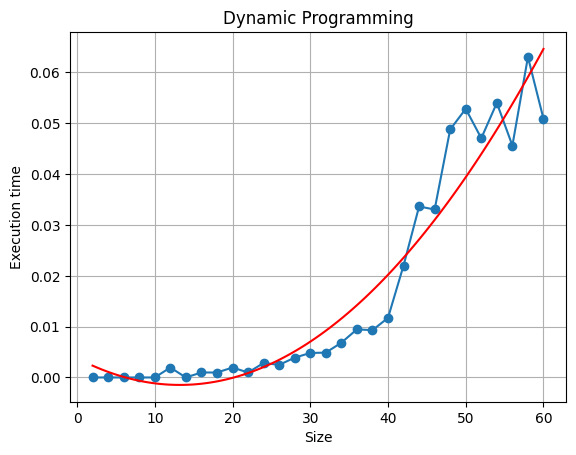

In [34]:
DP_POLINOMIAL_DEGREE = 2

# Fit a polynomial curve to the data
coef = np.polyfit(DPSampleSize, DPExecTime, DP_POLINOMIAL_DEGREE)
poli = np.poly1d(coef)

# Generate the curve
sizesCurve = np.linspace(min(DPSampleSize), max(DPSampleSize), 100)
timesCurve = poli(sizesCurve)

plt.plot(DPSampleSize, DPExecTime, marker='o')
plt.plot(sizesCurve, timesCurve, label='Curva ajustada', color='red')
plt.xlabel('Size')
plt.ylabel('Execution time')
plt.title('Dynamic Programming')
plt.grid(True)
plt.show()

### Divide and conquer

In [36]:
DnCExecTime = []
DnCSampleSize = []
for i, array in enumerate(arrays):
    start = time.time()
    MatrixChainOrderDnC(array)
    DnCExecTime.append(time.time() - start)
    DnCSampleSize.append(len(array))

    if i == 9:
        break

0
1
2
3
4
5
6
7
8
9


KeyboardInterrupt: 

In [ ]:
DNC_POLINOMIAL_DEGREE = 2

# Fit a polynomial curve to the data
coef = np.polyfit(DnCSampleSize, DnCExecTime, DNC_POLINOMIAL_DEGREE)
poli = np.poly1d(coef)

# Generate the curve
sizesCurve = np.linspace(min(DnCSampleSize), max(DnCSampleSize), 100)
timesCurve = poli(sizesCurve)

plt.plot(DnCSampleSize, DPExecTime, marker='o')
plt.plot(sizesCurve, timesCurve, label='Curva ajustada', color='red')
plt.xlabel('Size')
plt.ylabel('Execution time')
plt.title('Divide and Conquer')
plt.grid(True)
plt.show()

## Referencias
- GeeksforGeeks [GfG]. (2022). _Matrix Chain Multiplication | DP-8. GeeksforGeeks_. [https://www.geeksforgeeks.org/matrix-chain-multiplication-dp-8/](https://www.geeksforgeeks.org/matrix-chain-multiplication-dp-8/)
- More, C. (2019). Matrix Chain Multiplication using Dynamic Programming. Medium. [https://medium.com/@hichetanmore/matrix-chain-multiplication-using-dynamic-programming-22a137df955f](https://medium.com/@hichetanmore/matrix-chain-multiplication-using-dynamic-programming-22a137df955f)